In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Read the dataset to the python environment.

In [5]:
data=pd.read_excel('iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.shape

(150, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Classification features
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

## 2. Do necessary pre-processing steps.

In [10]:
# Checking null value
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

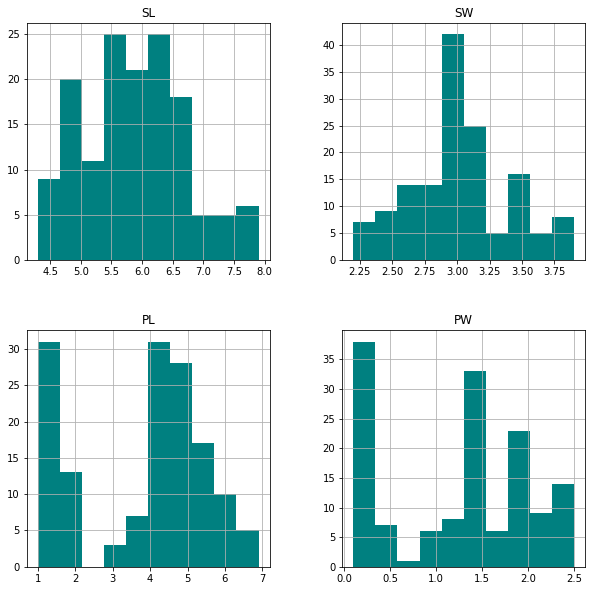

In [111]:
fg=data.select_dtypes(include=['float'])
fg.hist(figsize=(10,10), color='teal')
plt.show()

In [15]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [12]:
# Filling null values with the median 
for i in ['SL', 'SW', 'PL','PW']:
    data[i]=data[i].fillna(data[i].median())

In [13]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

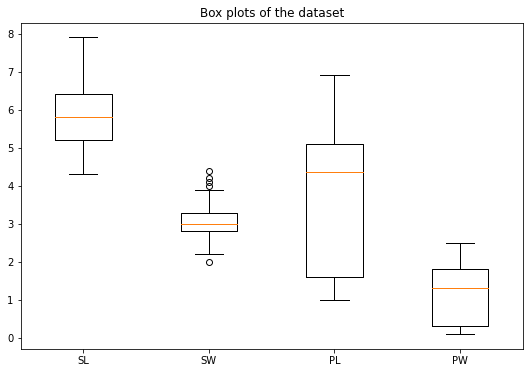

In [16]:
# Check outliers in the dataset
plt.figure(figsize=(9,6))
plt.boxplot(data[['SL', 'SW', 'PL', 'PW']],labels=['SL', 'SW', 'PL', 'PW'])
plt.title('Box plots of the dataset')
plt.show()

In [20]:
# Outlier present in the SW column

In [18]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print('Q1:', Q1)
print('Q2:', Q2)
print('Q3:', Q3)

Q1: 2.8
Q2: 3.0
Q3: 3.25


In [24]:
IQR=Q3-Q1
LW=q1-1.5*IQR
UP=q3+1.5*IQR
print('LW:',LW,'\n UP:',UP)

LW: 2.1249999999999996 
 UP: 3.9250000000000003


In [26]:
outlier=[]
for x in data['SW']:
    if((x>UP)or(x<LW)):
        outlier.append(x)
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [28]:
ind=(data['SW']>UP)|(data['SW']<LW)
dt=data.loc[ind].index
data.drop(dt,inplace=True)

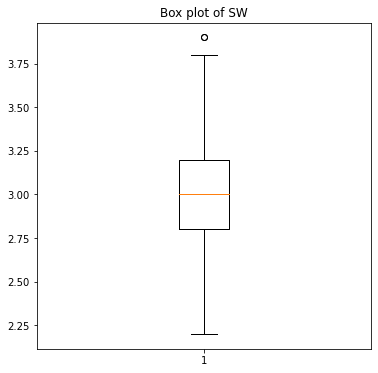

In [29]:
plt.figure(figsize=(6,6))
plt.boxplot(data['SW'])
plt.title('Box plot of SW')
plt.show()

In [32]:
# Removed all the outliers.
# label encoding on the dependent target value 

from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])
    
data.head()
# Converted the categorical target column to numerical for the model to be more accurate.

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm) 

In [33]:
data.describe()

,SL,SW,PL,PW,Classification
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897,1.027586
std,0.816827,0.374354,1.712265,0.758219,0.816027
min,4.300000,2.200000,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.200000,5.100000,1.800000,2.000000
max,7.900000,3.900000,6.900000,2.500000,2.000000


In [34]:
# splitting the dataset
x=data.drop(['Classification'],axis=1)
y=pd.DataFrame(data['Classification'])

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [38]:
x_train.shape

(101, 4)

In [39]:
y_train.shape

(101, 1)

In [35]:
x_test.shape

(44, 4)

In [36]:
y_test.shape

(44, 1)

In [37]:
# Building the model

### Logistic Regression 

In [38]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)
y_pred=log_model.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [40]:
print("Accuracy :", accuracy_score(y_test,y_pred))
print("Precision score :",precision_score(y_test,y_pred,average='macro'))
print("Recall_score :",recall_score(y_test,y_pred,average='macro'))
print('f1 score :',f1_score(y_test,y_pred,average='macro'))

Accuracy : 0.9545454545454546
Precision score : 0.9500891265597149
Recall_score : 0.9500891265597149
f1 score : 0.9500891265597149


In [47]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 16]], dtype=int64)

In [41]:
# By using logistic regression, accuracy and f1 score is 95%

### KNN 

In [42]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'Accuracy')

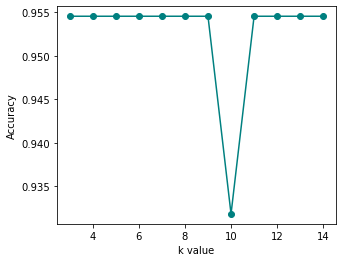

In [112]:
plt.figure(figsize=(5,4))
plt.plot(neighbors,acc_values,'o-',color='teal')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [46]:
# Taking k=5
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [64]:
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Precision score :",precision_score(y_test,y_pred,average='macro'))
print("Recall_score :",recall_score(y_test,y_pred,average='macro'))
print('f1 score :',f1_score(y_test,y_pred,average='macro'))

Accuracy : 0.9545454545454546
Precision score : 0.9500891265597149
Recall_score : 0.9500891265597149
f1 score : 0.9500891265597149


In [65]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 16]], dtype=int64)

In [66]:
y_test.value_counts()

Classification
2                 17
0                 16
1                 11
dtype: int64

In [67]:
#Using KNN,the accuracy and f1 score is 95%

### Decision Tree Classifier 

In [69]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [70]:
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Precision score :",precision_score(y_test,y_pred,average='macro'))
print("Recall_score :",recall_score(y_test,y_pred,average='macro'))
print('f1 score :',f1_score(y_test,y_pred,average='macro'))

Accuracy : 0.9545454545454546
Precision score : 0.9500891265597149
Recall_score : 0.9500891265597149
f1 score : 0.9500891265597149


In [71]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 16]], dtype=int64)

In [72]:
#Using Decision Tree classifier, the accuracy and f1 score is 95%

### SVM 

In [73]:
# Linear classifier
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [74]:
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Precision score :",precision_score(y_test,y_pred,average='macro'))
print("Recall_score :",recall_score(y_test,y_pred,average='macro'))
print('f1 score :',f1_score(y_test,y_pred,average='macro'))

Accuracy : 0.9545454545454546
Precision score : 0.9500891265597149
Recall_score : 0.9500891265597149
f1 score : 0.9500891265597149


In [75]:
# Polynomial SVM
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [76]:
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Precision score :",precision_score(y_test,y_pred,average='macro'))
print("Recall_score :",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

Accuracy : 0.9545454545454546
Precision score : 0.9500891265597149
Recall_score : 0.9500891265597149
f1 score: 0.9500891265597149


In [68]:
# Radial SVM
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [77]:
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Precision score :",precision_score(y_test,y_pred,average='macro'))
print("Recall_score :",recall_score(y_test,y_pred,average='macro'))
print('f1 score :',f1_score(y_test,y_pred,average='macro'))

Accuracy : 0.9545454545454546
Precision score : 0.9500891265597149
Recall_score : 0.9500891265597149
f1 score : 0.9500891265597149


### Random Forest Classifier 

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [79]:
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Precision score :",precision_score(y_test,y_pred,average='macro'))
print("Recall_score :",recall_score(y_test,y_pred,average='macro'))
print('f1 score :',f1_score(y_test,y_pred,average='macro'))

Accuracy : 0.9545454545454546
Precision score : 0.9500891265597149
Recall_score : 0.9500891265597149
f1 score : 0.9500891265597149


In [80]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 16]], dtype=int64)

In [81]:
# Fine tuning of Hyper parameters
rft=RandomForestClassifier(n_estimators=200,max_depth=10,random_state=42,criterion='entropy')

rft.fit(x_train,y_train)
y_pred=rft.predict(x_test)

In [82]:
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Precision score :",precision_score(y_test,y_pred,average='macro'))
print("Recall_score :",recall_score(y_test,y_pred,average='macro'))
print('f1 score :',f1_score(y_test,y_pred,average='macro'))

Accuracy : 0.9545454545454546
Precision score : 0.9500891265597149
Recall_score : 0.9500891265597149
f1 score : 0.9500891265597149


In [78]:
# Accuracy is 95%

In [83]:
# Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

In [84]:
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Precision score :",precision_score(y_test,y_pred,average='macro'))
print("Recall_score :",recall_score(y_test,y_pred,average='macro'))
print('f1 score :',f1_score(y_test,y_pred,average='macro'))

Accuracy : 0.9545454545454546
Precision score : 0.9500891265597149
Recall_score : 0.9500891265597149
f1 score : 0.9500891265597149


### Standardising the features 

In [85]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [86]:
# logistic Regression after standardization
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [87]:
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Precision score :",precision_score(y_test,y_pred,average='macro'))
print("Recall_score :",recall_score(y_test,y_pred,average='macro'))
print('f1 score :',f1_score(y_test,y_pred,average='macro'))

Accuracy : 0.9772727272727273
Precision score : 0.9814814814814815
Recall_score : 0.9696969696969697
f1 score : 0.9746031746031746


In [86]:
# After standardization of the feature, the accuracy becomes 97%.

In [90]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [91]:
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Precision score :",precision_score(y_test,y_pred,average='macro'))
print("Recall_score :",recall_score(y_test,y_pred,average='macro'))
print('f1 score :',f1_score(y_test,y_pred,average='macro'))

Accuracy : 0.9318181818181818
Precision score : 0.9296296296296296
Recall_score : 0.9197860962566846
f1 score : 0.9238095238095237


In [93]:
## After standardization in the logistic regression, the accuracy is 97%

In [103]:
# Doing other models after standardization
#SVM
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [104]:
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Precision score :",precision_score(y_test,y_pred,average='macro'))
print("Recall_score :",recall_score(y_test,y_pred,average='macro'))
print('f1 score :',f1_score(y_test,y_pred,average='macro'))

Accuracy : 0.9772727272727273
Precision score : 0.9814814814814815
Recall_score : 0.9696969696969697
f1 score : 0.9746031746031746


In [105]:
# DT
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [106]:
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Precision score :",precision_score(y_test,y_pred,average='macro'))
print("Recall_score :",recall_score(y_test,y_pred,average='macro'))
print('f1 score :',f1_score(y_test,y_pred,average='macro'))

Accuracy : 0.9318181818181818
Precision score : 0.9296296296296296
Recall_score : 0.9197860962566846
f1 score : 0.9238095238095237


In [107]:
#KNN
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [108]:
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9772727272727273
precision score: 0.9814814814814815
recall_score: 0.9696969696969697
f1 score: 0.9746031746031746
